<a href="https://colab.research.google.com/github/Abosssya/Loan_data/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*We will make and train a logistic regression(Binary Classification problem) model using loan appication dataset to predict if loan will be accepted or rejected*

# Importing Data and Libararies

In [114]:
import pandas as pd
import plotly.express as px #high-level visualization library for interactive plots.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

*To upload our file to colab we will use google.colab module*

In [115]:
from google.colab import files
uploaded = files.upload()

Saving train_u6lujuX_CVtuZ9i (1).csv to train_u6lujuX_CVtuZ9i (1) (1).csv


In [116]:
raw_df = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
raw_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [117]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


It might be a good idea to discard the rows where the value of `Loan_Status` is missing to make our analysis and modeling simpler

In [118]:
raw_df.dropna(subset='Loan_Status', inplace=True)

# Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries.

In [119]:
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [120]:
px.histogram(raw_df, x='LoanAmount', title='Loan Amount vs Gender', color='Gender')

In [121]:
px.scatter(raw_df, x='ApplicantIncome', y='LoanAmount', title='Applicant Income vs Loan Amount', color='Married')

In [122]:
px.box(raw_df, x='Education', y='ApplicantIncome', title='Education and ApplicantIncome')

Text(0.5, 1.0, 'Loan_Status vs ApplicantIncome')

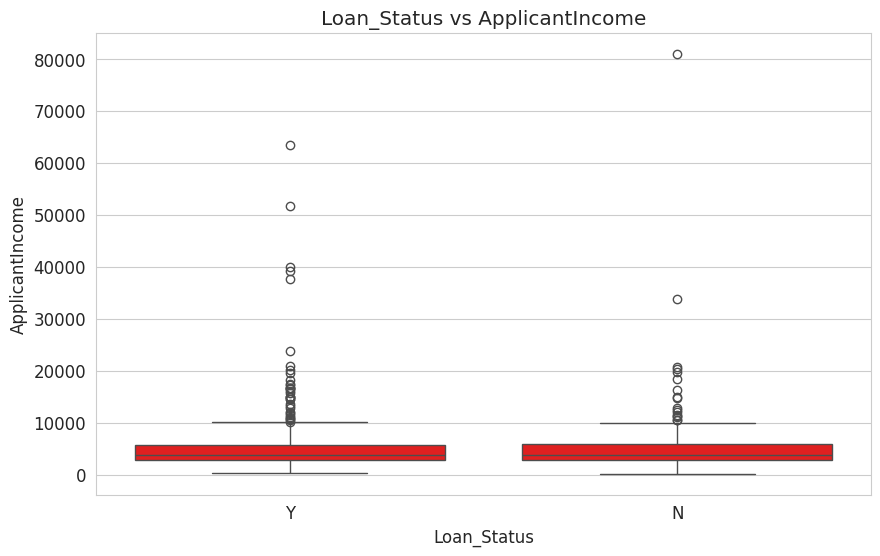

In [123]:
sns.boxplot(data=raw_df, x='Loan_Status', y='ApplicantIncome', color='red')
plt.title('Loan_Status vs ApplicantIncome')

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

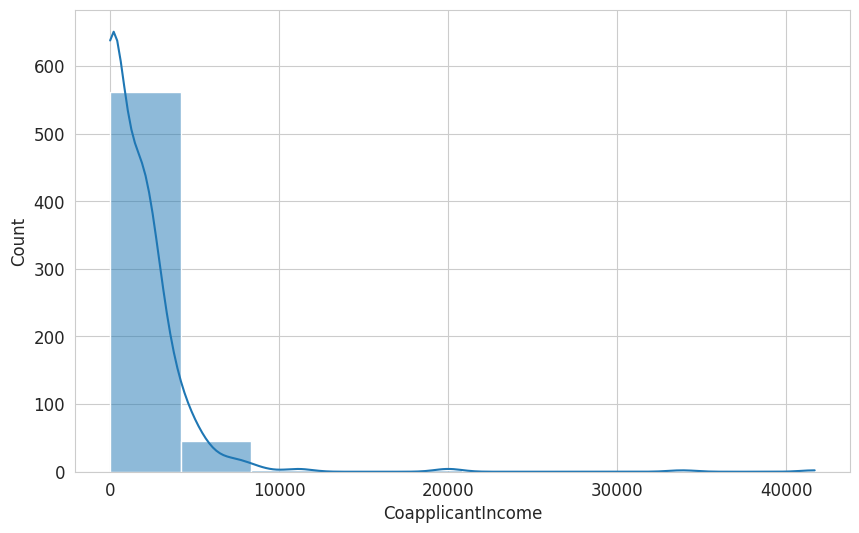

In [124]:
sns.histplot(raw_df, x='CoapplicantIncome', kde=True, bins=10)

# Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well.

3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.




As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


In [125]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42,stratify=raw_df['Loan_Status'])
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

Tt is better to *split the dataset chronologically* rather than randomly. This ensures that the model learns from past data and is tested on future data, which mimics real-world scenarios. Like that :

✅ Training Set → Older data (past years)

✅ Validation Set → Recent past (1 year before test set)

✅ Test Set → Most recent data (last 2 years)



But since we dont have the date column we will use *random split* (It evaluates the model's performance during the training phase, helping adjust hyper-parameters and prevent over-fitting.), with *stratified code split* to  ensure that both classes (Y and N) are represented in the same proportions in each split (train, validation, and test).

In [126]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(368, 13)
(123, 13)
(123, 13)


In [127]:
raw_df.Loan_Status.value_counts()

,count
Loan_Status,
Y,422
N,192


We can see that Y has more instances than N, *stratify=raw_df['Loan_Status']* will maintain the ratio of Y to N in the resulting splits, preventing any class from being over- or under-represented.

# Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Loan_ID` column

Let's create a list of input columns, and also identify the target column.

In [128]:
#raw_df.drop('Loan_ID', axis=1, inplace=True)
raw_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [129]:
input_cols = list(raw_df.columns)[:-1]
target_col = 'Loan_Status'

print(input_cols)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [130]:
#training
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

#validation
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

#test
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [131]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()
categ_cols = train_inputs.select_dtypes('object').columns.to_list()

# np.number includes both integers (int64) and floating-point numbers (float64).
# in Pandas, categorical data is often stored as object type.

let's view some statistics of numeric columns

In [132]:
train_inputs[numeric_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,368.000000,368.000000,352.000000,358.000000,335.000000
mean,5553.619565,1640.733152,150.681818,341.597765,0.856716
std,6496.845555,3069.683380,86.998385,65.895556,0.350886
min,210.000000,0.000000,9.000000,12.000000,0.000000
25%,2892.750000,0.000000,104.750000,360.000000,1.000000
50%,3888.500000,1036.000000,130.000000,360.000000,1.000000
75%,5867.500000,2250.750000,175.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [133]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')

Before we perform imputation, let's check the no. of missing values in each numeric column.

In [134]:
raw_df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset

In [135]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [136]:
list(imputer.statistics_)

[np.float64(5403.459283387622),
 np.float64(1621.2457980271008),
 np.float64(146.41216216216216),
 np.float64(342.0),
 np.float64(0.8421985815602837)]

In [137]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column.

In [138]:
train_inputs[numeric_cols].isna().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# Scaling Numeric Faatures

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [139]:
raw_df[numeric_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
?MinMaxScaler # shows documentation about MinMaxScaler, including parameters and usage

Object `MinMaxScaler # shows documentation about MinMaxScaler, including parameters and usage` not found.


In [142]:
scaler = MinMaxScaler() # Creates a MinMaxScaler object, which will later be used to transform data.

First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.

In [143]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

We can see the minimum and maximum for each column

In [144]:
print('Minimum' , list(scaler.data_min_))
print('Mazimum', list(scaler.data_max_))

Minimum [np.float64(150.0), np.float64(0.0), np.float64(9.0), np.float64(12.0), np.float64(0.0)]
Mazimum [np.float64(81000.0), np.float64(41667.0), np.float64(700.0), np.float64(480.0), np.float64(1.0)]


We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [145]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

We can check if all values in each column lies in range (0,1)

In [146]:
train_inputs[numeric_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,368.000000,368.000000,368.000000,368.000000,368.000000
mean,0.066835,0.039377,0.204770,0.704292,0.855415
std,0.080357,0.073672,0.123134,0.138871,0.334765
min,0.000742,0.000000,0.000000,0.000000,0.000000
25%,0.033924,0.000000,0.141462,0.743590,1.000000
50%,0.046240,0.024864,0.178003,0.743590,1.000000
75%,0.070717,0.054018,0.236252,0.743590,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [147]:
raw_df[categ_cols].nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Property_Area,3


We can perform one hot encoding using the OneHotEncoder class from sklearn.preprocessing.

In [148]:
from sklearn.preprocessing import OneHotEncoder

In [149]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# sparse=False --- Ensures that the output is a NumPy array, not a sparse matrix.
# handle_unknown='ignore' --- If a new category appears during transform(), it ignores it instead of throwing an error.

First, we `fit` the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [150]:
encoder.fit(raw_df[categ_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [151]:
encoder.categories_

[array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
        'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
        'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
        'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
        'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
        'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
        'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
        'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
        'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
        'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
        'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
        'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
        'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
        'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
        'LP001243', 'LP001245', 'LP001248', 'LP0

The encoder has created a list of categories for each of the categorical columns in the dataset.

We can generate column names for each individual category using `get_feature_names`.

In [152]:
encoded_cols = list(encoder.get_feature_names_out(categ_cols))
print(encoded_cols)

['Loan_ID_LP001002', 'Loan_ID_LP001003', 'Loan_ID_LP001005', 'Loan_ID_LP001006', 'Loan_ID_LP001008', 'Loan_ID_LP001011', 'Loan_ID_LP001013', 'Loan_ID_LP001014', 'Loan_ID_LP001018', 'Loan_ID_LP001020', 'Loan_ID_LP001024', 'Loan_ID_LP001027', 'Loan_ID_LP001028', 'Loan_ID_LP001029', 'Loan_ID_LP001030', 'Loan_ID_LP001032', 'Loan_ID_LP001034', 'Loan_ID_LP001036', 'Loan_ID_LP001038', 'Loan_ID_LP001041', 'Loan_ID_LP001043', 'Loan_ID_LP001046', 'Loan_ID_LP001047', 'Loan_ID_LP001050', 'Loan_ID_LP001052', 'Loan_ID_LP001066', 'Loan_ID_LP001068', 'Loan_ID_LP001073', 'Loan_ID_LP001086', 'Loan_ID_LP001087', 'Loan_ID_LP001091', 'Loan_ID_LP001095', 'Loan_ID_LP001097', 'Loan_ID_LP001098', 'Loan_ID_LP001100', 'Loan_ID_LP001106', 'Loan_ID_LP001109', 'Loan_ID_LP001112', 'Loan_ID_LP001114', 'Loan_ID_LP001116', 'Loan_ID_LP001119', 'Loan_ID_LP001120', 'Loan_ID_LP001123', 'Loan_ID_LP001131', 'Loan_ID_LP001136', 'Loan_ID_LP001137', 'Loan_ID_LP001138', 'Loan_ID_LP001144', 'Loan_ID_LP001146', 'Loan_ID_LP001151',

All of the above columns will be added to `train_inputs`, `val_inputs` and `test_inputs`.

In [153]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categ_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categ_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categ_cols])

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-153-3abcb79602c4>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-153-3abcb79602c4>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-153-3abcb79602c4>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

We can verify that these new columns have been added to our training, test and validation sets.

In [154]:
pd.set_option('display.max_columns', None)
test_inputs.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001018,Loan_ID_LP001020,Loan_ID_LP001024,Loan_ID_LP001027,Loan_ID_LP001028,Loan_ID_LP001029,Loan_ID_LP001030,Loan_ID_LP001032,Loan_ID_LP001034,Loan_ID_LP001036,Loan_ID_LP001038,Loan_ID_LP001041,Loan_ID_LP001043,Loan_ID_LP001046,Loan_ID_LP001047,Loan_ID_LP001050,Loan_ID_LP001052,Loan_ID_LP001066,Loan_ID_LP001068,Loan_ID_LP001073,Loan_ID_LP001086,Loan_ID_LP001087,Loan_ID_LP001091,Loan_ID_LP001095,Loan_ID_LP001097,Loan_ID_LP001098,Loan_ID_LP001100,Loan_ID_LP001106,Loan_ID_LP001109,Loan_ID_LP001112,Loan_ID_LP001114,Loan_ID_LP001116,Loan_ID_LP001119,Loan_ID_LP001120,Loan_ID_LP001123,Loan_ID_LP001131,Loan_ID_LP001136,Loan_ID_LP001137,Loan_ID_LP001138,Loan_ID_LP001144,Loan_ID_LP001146,Loan_ID_LP001151,Loan_ID_LP001155,Loan_ID_LP001157,Loan_ID_LP001164,Loan_ID_LP001179,Loan_ID_LP001186,Loan_ID_LP001194,Loan_ID_LP001195,Loan_ID_LP001197,Loan_ID_LP001198,Loan_ID_LP001199,Loan_ID_LP001205,Loan_ID_LP001206,Loan_ID_LP001207,Loan_ID_LP001213,Loan_ID_LP001222,Loan_ID_LP001225,Loan_ID_LP001228,Loan_ID_LP001233,Loan_ID_LP001238,Loan_ID_LP001241,Loan_ID_LP001243,Loan_ID_LP001245,Loan_ID_LP001248,Loan_ID_LP001250,Loan_ID_LP001253,Loan_ID_LP001255,Loan_ID_LP001256,Loan_ID_LP001259,Loan_ID_LP001263,Loan_ID_LP001264,Loan_ID_LP001265,Loan_ID_LP001266,Loan_ID_LP001267,Loan_ID_LP001273,Loan_ID_LP001275,Loan_ID_LP001279,Loan_ID_LP001280,Loan_ID_LP001282,Loan_ID_LP001289,Loan_ID_LP001310,Loan_ID_LP001316,Loan_ID_LP001318,Loan_ID_LP001319,Loan_ID_LP001322,Loan_ID_LP001325,Loan_ID_LP001326,Loan_ID_LP001327,Loan_ID_LP001333,Loan_ID_LP001334,Loan_ID_LP001343,Loan_ID_LP001345,Loan_ID_LP001349,Loan_ID_LP001350,Loan_ID_LP001356,Loan_ID_LP001357,Loan_ID_LP001367,Loan_ID_LP001369,Loan_ID_LP001370,Loan_ID_LP001379,Loan_ID_LP001384,Loan_ID_LP001385,Loan_ID_LP001387,Loan_ID_LP001391,Loan_ID_LP001392,Loan_ID_LP001398,Loan_ID_LP001401,Loan_ID_LP001404,Loan_ID_LP001405,Loan_ID_LP001421,Loan_ID_LP001422,Loan_ID_LP001426,Loan_ID_LP001430,Loan_ID_LP001431,Loan_ID_LP001432,Loan_ID_LP001439,Loan_ID_LP001443,Loan_ID_LP001448,Loan_ID_LP001449,Loan_ID_LP001451,Loan_ID_LP001465,Loan_ID_LP001469,Loan_ID_LP001473,Loan_ID_LP001478,Loan_ID_LP001482,Loan_ID_LP001487,Loan_ID_LP001488,Loan_ID_LP001489,Loan_ID_LP001491,Loan_ID_LP001492,Loan_ID_LP001493,Loan_ID_LP001497,Loan_ID_LP001498,Loan_ID_LP001504,Loan_ID_LP001507,Loan_ID_LP001508,Loan_ID_LP001514,Loan_ID_LP001516,Loan_ID_LP001518,Loan_ID_LP001519,Loan_ID_LP001520,Loan_ID_LP001528,Loan_ID_LP001529,Loan_ID_LP001531,Loan_ID_LP001532,Loan_ID_LP001535,Loan_ID_LP001536,Loan_ID_LP001541,Loan_ID_LP001543,Loan_ID_LP001546,Loan_ID_LP001552,Loan_ID_LP001560,Loan_ID_LP001562,Loan_ID_LP001565,Loan_ID_LP001570,Loan_ID_LP001572,Loan_ID_LP001574,Loan_ID_LP001577,Loan_ID_LP001578,Loan_ID_LP001579,Loan_ID_LP001580,Loan_ID_LP001581,Loan_ID_LP001585,Loan_ID_LP001586,Loan_ID_LP001594,Loan_ID_LP001603,Loan_ID_LP001606,Loan_ID_LP001608,Loan_ID_LP001610,Loan_ID_LP001616,Loan_ID_LP001630,Loan_ID_LP001633,Loan_ID_LP001634,Loan_ID_LP001636,Loan_ID_LP001637,Loan_ID_LP001639,Loan_ID_LP001640,Loan_ID_LP001641,Loan_ID_LP001643,Loan_ID_LP001644,Loan_ID_LP001647,Loan_ID_LP001653,Loan_ID_LP001656,Loan_ID_LP001657,Loan_ID_LP001658,Loan_ID_LP001664,Loan_ID_LP001665,Loan_ID_LP001666,Loan_ID_LP001669,Loan_ID_LP001671,Loan_ID_LP001673,Loan_ID_LP001674,Loan_ID_LP001677,Loan_ID_LP001682,Loan_ID_LP001688,Loan_ID_LP001691,Loan_ID_LP001692,Loan_ID_LP001693,Loan_ID_LP001698,Loan_ID_LP001699,Loan_ID_LP001702,Loan_ID_LP001708,Loan_ID_LP001711,Loan_ID_LP001713,Loan_ID_LP001715,Loan_ID_LP001716,Loan_ID_LP001720,Loan_ID_LP001722,Loan_ID_LP001726,Loan_ID_LP001732,Loan_ID_LP001734,Loan_ID_LP001736,Loan_ID_LP001743,Loan_ID_LP001744,Loan_ID_LP001749,Loan_ID_LP001750,Loan_ID_LP001751,Loan_ID_

# Training a Logistic Regression Model


To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
?LogisticRegression # It explains all parameters, attributes, and methods of the model.

Object `LogisticRegression # It explains all parameters, attributes, and methods of the model.` not found.


In [157]:
model = LogisticRegression(solver='liblinear') # is a mathematical algorithm used to find the best coefficients for the model

In [158]:
model.fit(train_inputs[numeric_cols+encoded_cols], train_target)

LogisticRegression(solver='liblinear')

Let's check the weights and biases of the trained model.

In [159]:
print(model.coef_)

[[-0.13820679 -0.45432101 -0.17844715  0.32444144  3.04296244  0.2700752
  -0.57751027  0.          0.26215203  0.26988765  0.19839707  0.
   0.          0.1499171  -0.69091002  0.14592301  0.          0.15896838
  -0.53302089  0.16368882  0.26891304  0.          0.         -0.54946812
   0.17507811 -0.08808771  0.25173568 -0.15651322 -0.15841282 -0.64458134
   0.13423128  0.10270034  0.219403   -0.44122295  0.09995644 -0.49699464
  -0.54936422 -0.39417439  0.10208995  0.          0.1814608   0.
   0.0786408   0.2843334   0.24197524 -0.54890984  0.26689612  0.2441971
   0.          0.31565059  0.21980919  0.          0.17925987 -0.17058395
   0.13156623  0.          0.12826086 -0.74033758 -0.71073141  0.
   0.          0.          0.          0.          0.          0.
   0.17513645  0.         -0.09639113 -0.1905539  -0.77309537 -0.04485041
   0.24327417  0.35037543 -0.18983376  0.18394094  0.16529414  0.16702096
  -0.15958277  0.         -0.56364573 -0.53362779 -0.5194164  -0.2210858

*Higher the weight, greater the impact of the column on the prediction.*

Let;s not forget that most of them are related to Loan_ID

In [160]:
print(model.intercept_)

[-0.61194719]


#Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test

In [161]:
x_train = train_inputs[numeric_cols+encoded_cols]
x_val = val_inputs[numeric_cols+encoded_cols]
x_test = test_inputs[numeric_cols+encoded_cols]

In [162]:
train_pred = model.predict(x_train)
train_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y

In [163]:
train_target

,Loan_Status
356,Y
137,Y
244,Y
42,Y
327,Y
...,...
580,Y
98,Y
543,Y
209,N


We can output a probabilistic prediction using predict_proba.

In [164]:
train_proba = model.predict_proba(x_train)
train_proba

array([[0.15770389, 0.84229611],
       [0.19062395, 0.80937605],
       [0.1616329 , 0.8383671 ],
       [0.2441969 , 0.7558031 ],
       [0.13585059, 0.86414941],
       [0.44375951, 0.55624049],
       [0.32923737, 0.67076263],
       [0.55970842, 0.44029158],
       [0.24196795, 0.75803205],
       [0.08075819, 0.91924181],
       [0.20408746, 0.79591254],
       [0.24180111, 0.75819889],
       [0.12730639, 0.87269361],
       [0.08034754, 0.91965246],
       [0.35539194, 0.64460806],
       [0.48801982, 0.51198018],
       [0.17836144, 0.82163856],
       [0.10209114, 0.89790886],
       [0.65991878, 0.34008122],
       [0.16527833, 0.83472167],
       [0.1901193 , 0.8098807 ],
       [0.26221721, 0.73778279],
       [0.28433745, 0.71566255],
       [0.83691912, 0.16308088],
       [0.18642307, 0.81357693],
       [0.94680548, 0.05319452],
       [0.269889  , 0.730111  ],
       [0.27220651, 0.72779349],
       [0.10052729, 0.89947271],
       [0.84833131, 0.15166869],
       [0.

The numbers above indicate the probabilities for the target classes "No" and "Yes".

In [165]:
model.classes_

array(['N', 'Y'], dtype=object)

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [166]:
from sklearn.metrics import accuracy_score

In [167]:
accuracy_score(train_target, train_pred)

0.8260869565217391

The model achieves an accuracy of **82.6%**

The accuracy of the model on the test and validation set are between 80-85%, which suggests that our model generalizes well to data it hasn't seen before.

But how good is 82% accuracy? While this acutally depends on the nature of the problem and on business requirements, a good way to verify if a model has actually learned something useful is to compare its results to a "random" or "dumb" ( It always predicts 'No' for every input, regardless of the actual input or any features) model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

### Why Compare to These Models?

Comparing a real model’s accuracy to that of a random or "dumb" model gives you an idea of how well your model is performing. If your model’s accuracy is only slightly better than these simple models, then it likely hasn’t learned anything meaningful about the data. However, if it significantly outperforms these models, then it suggests that the model has learned useful patterns from the data.

In [168]:
def random(inputs):
  return np.random.choice(['N', 'Y'], len(inputs))

def dumb(inputs):
  return np.full(len(inputs), 'N')

Let's check the accuracies of these two models on the test set.

In [169]:
accuracy_score(test_target, random(x_test))

0.4715447154471545

In [170]:
accuracy_score(test_target, dumb(x_test))

0.3089430894308943

Our random model achieves an accuracy of 50% and our "always No" model achieves an accuracy of 77%.

So, our model is much more better and accurate than random and dumb ones

# Linear Regression

Our goal through *linear regression* is to find a way to estimate the value in the "LoanAmount" column using the values in the other columns.
We apply Linear Regression as the second step of our model, after first using Logistic Regression to determine loan amount.

Let's start with finding correlation of our target column *LoanAmount* with all columns. But we need to convert our categorical columns into numeric columns


In [171]:
categ_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

The first step is to create a new df where we can convert columns into numeric and then drop Loan_ID column since it will not any correlation with LoanAmount

In [172]:
copy_df = raw_df.copy()

# Converting categ cols into numeric columns
copy_df['Gender'] = copy_df['Gender'].map({'Male': 0, 'Female': 1})
copy_df['Married'] = copy_df['Married'].map({'No': 0, 'Yes': 1})
copy_df['Education'] = copy_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
copy_df['Self_Employed'] = copy_df['Self_Employed'].map({'No': 0, 'Yes': 1})
copy_df['Property_Area'] = copy_df['Property_Area'].map({'Urban': 2, 'Rural': 0, 'Semiurban': 1})
copy_df['Dependents'] = copy_df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
copy_df['Loan_Status'] = copy_df['Loan_Status'].map({'N':0, "Y":1})

# Dropping unnecessary column
copy_df.drop('Loan_ID', axis=1, inplace=True)

# Our df is correlation
corr_df = copy_df.corr()

# The correlation of all columns with the target column
target_corr = corr_df['LoanAmount']
target_corr.sort_values(ascending=False)

,LoanAmount
LoanAmount,1.000000
ApplicantIncome,0.570909
CoapplicantIncome,0.188619
Education,0.171133
Dependents,0.163997
Married,0.149519
Self_Employed,0.123931
Loan_Amount_Term,0.039447
Credit_History,-0.008433
Loan_Status,-0.037318


<Axes: >

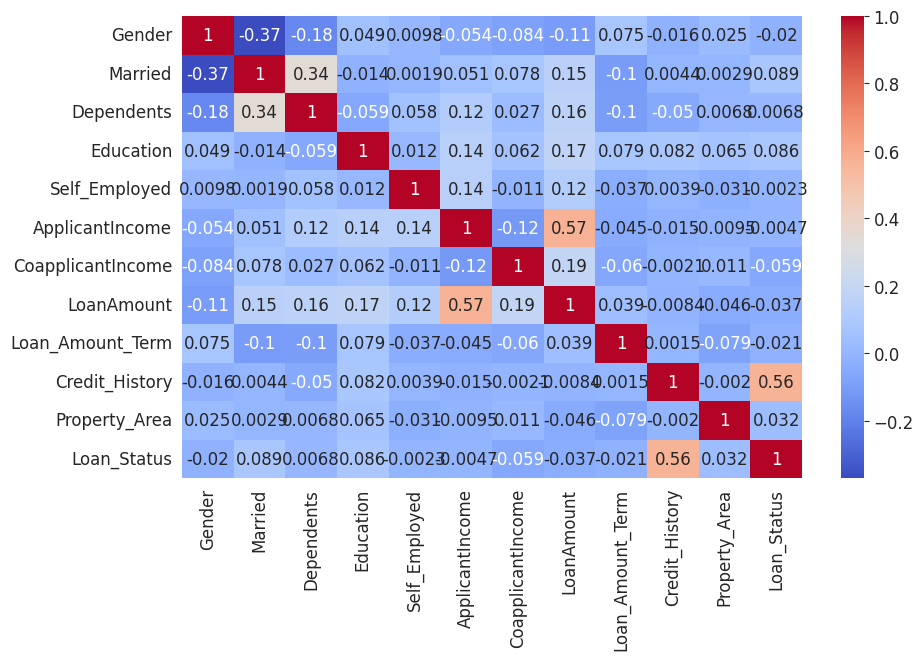

In [173]:
sns.heatmap(corr_df,cmap='coolwarm', annot=True)

Ad we can see, the ApplicantIncome has the strongest correlation with LoanAmount. Let's chart a scatter plot to visualize the relationship between them

<Axes: title={'center': 'Loan Amount vs Applicant Income'}, xlabel='LoanAmount', ylabel='ApplicantIncome'>

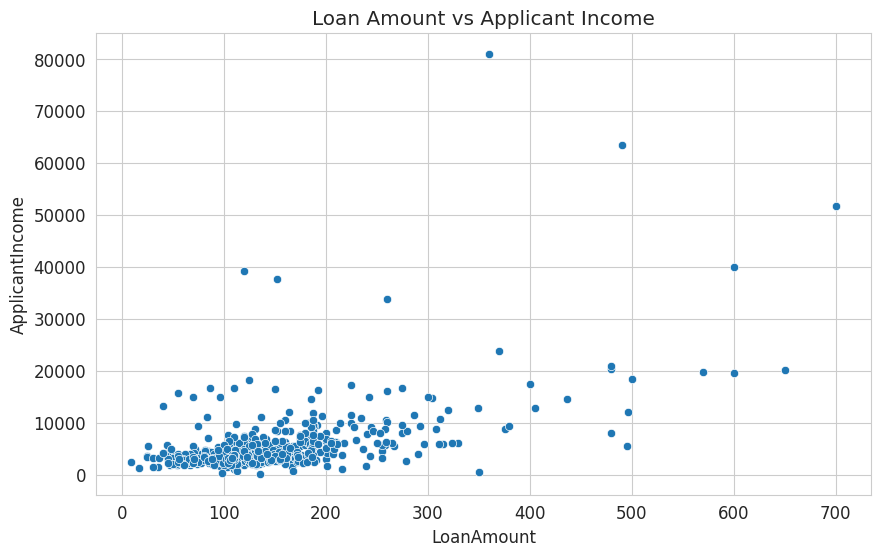

In [174]:
plt.title('Loan Amount vs Applicant Income')
sns.scatterplot(data=copy_df, x='LoanAmount', y='ApplicantIncome')

# Model

In the abobe plot, the x axis shows *LoanAmount* and *y* shows *ApplicantIncome*

So, we can assune the following relationship between them : **LoanAmount = w*ApplicantIncome + b**,

Where *w* is *Weight / Slope / Coefficient* and tt represents the change in LoanAmount for a one-unit increase in ApplicantIncome.

If **w > 0**, LoanAmount increases as ApplicantIncome increases.



If **w < 0**, LoanAmount decreases as ApplicantIncome increases.

**b** is *Intercept* and it represents the LoanAmount when ApplicantIncome is 0.

Let define a helper function estimate_loan_amount, to compute
loan_amount, given applicant_income,
w and
b
.

In [175]:
# The estimate_loan_amount function is our very first model
def estimate_loan_amount(applicant_income,w,b):
  return w*applicant_income + b

# Let's guess the values for w and b and use them to estimate LoanAmounts
applicant_income = raw_df['ApplicantIncome']
w= 0.75
b = 300

y_amounts = estimate_loan_amount(applicant_income,w,b)

Text(0, 0.5, 'Loan Amount')

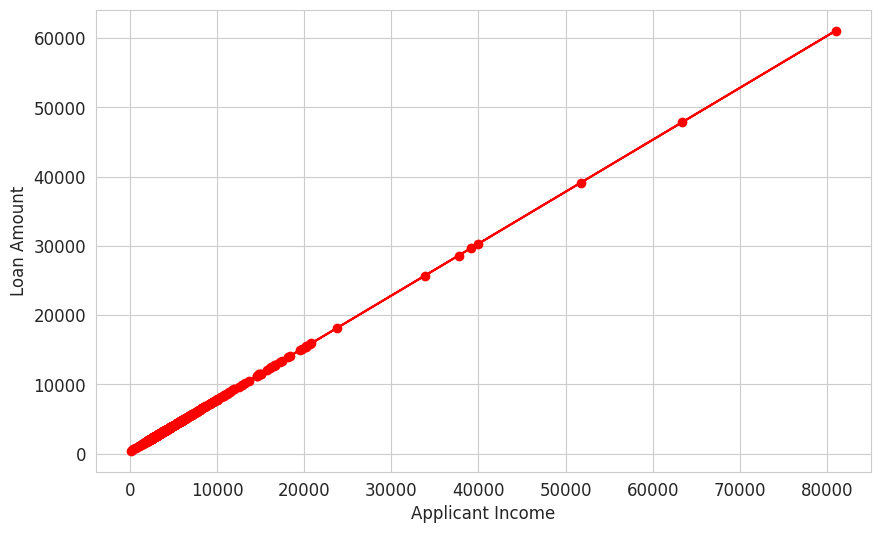

In [176]:
plt.plot(applicant_income, y_amounts, 'r-o')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')

Now, we can overlay tis on the acutal data

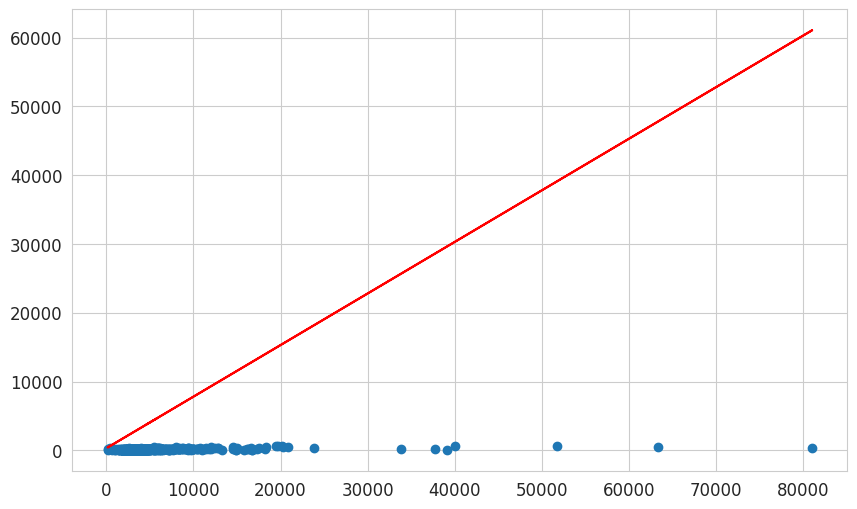

In [177]:
plt.plot(applicant_income, y_amounts, 'r')
plt.scatter(copy_df['ApplicantIncome'], copy_df['LoanAmount'])

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

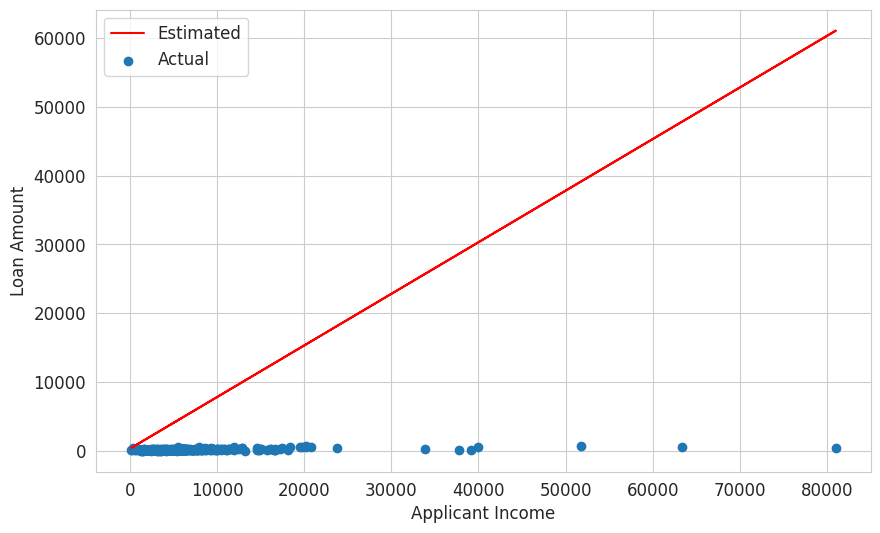

In [178]:
def try_parameters(w,b):
  applicant_income = copy_df['ApplicantIncome']
  loan_amount = copy_df['LoanAmount']

  y_amounts = estimate_loan_amount(applicant_income,w,b)

  plt.plot(applicant_income, y_amounts, 'r')
  plt.scatter(applicant_income, loan_amount)
  plt.xlabel('Applicant Income')
  plt.ylabel('Loan Amount')
  plt.legend(['Estimated', 'Actual'])

try_parameters(0.75,300)

# Loss/Cost Function

We can compare our model's predictions(As we change the values, of $w$ and $b$ manually, trying to move the line visually closer to the points) with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE)

In [179]:
import numpy as np

def rmse(target, prediction):
  return np.sqrt(np.mean(np.square(target - prediction)))

Let's find *rmse* using our variables *w = 0.75 and b = 300*

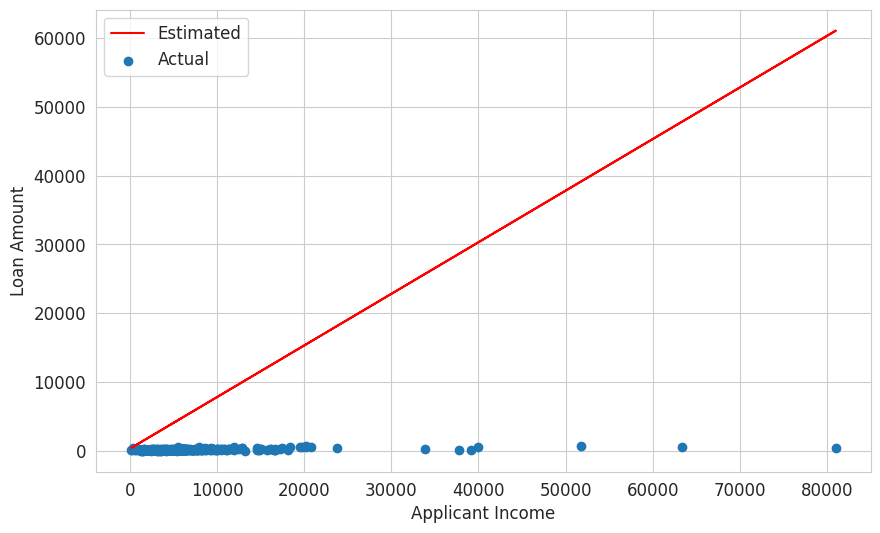

In [180]:
w = 0.75
b = 300

try_parameters(w,b)

In [181]:
target = copy_df['LoanAmount']
prediction = estimate_loan_amount(copy_df['ApplicantIncome'], w,b)

rmse(target, prediction)

np.float64(6212.094645437096)

*On average, each element in the prediction differs from the actual target by 6212.*

**The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.**

Let's add our rmse to our model

RMSE loss:6212.094645437096


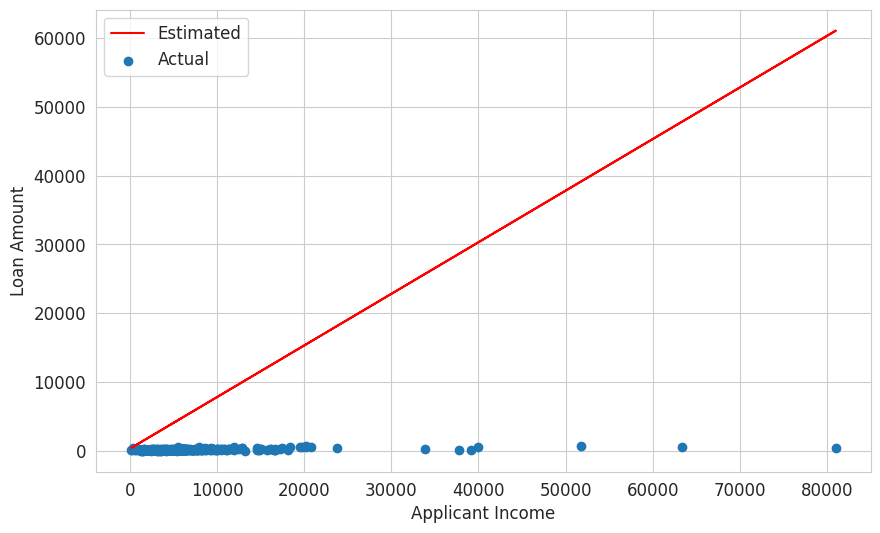

In [182]:
def try_parameters(w,b):
  applicant_income = copy_df['ApplicantIncome']
  loan_amount = copy_df['LoanAmount']

  y_amounts = estimate_loan_amount(applicant_income,w,b)

  plt.plot(applicant_income, y_amounts, 'r')
  plt.scatter(applicant_income, loan_amount)
  plt.xlabel('Applicant Income')
  plt.ylabel('Loan Amount')
  plt.legend(['Estimated', 'Actual'])

  loss = rmse(loan_amount, y_amounts)
  print(f"RMSE loss:{loss}")

try_parameters(0.75,300)

***Wouldn't it be covvinient if a computer could try several different values of `w` and `b` and _learn_ the relationship between "ApplicantIncome" and "LoanAmount"?***

To do this, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "ApplicantIncome" vs. "LoanAmount" using the ordinary least squares optimization technique.


In [183]:
from sklearn.linear_model import LinearRegression

Creating the model object

In [184]:
model = LinearRegression()

Let's find the best fit for our model using *fit*

In [185]:
model.fit

<bound method LinearRegression.fit of LinearRegression()>

*Also, x input should be in 2d array, so we need to pass a df . not a single column*

In [186]:
imputer_target = SimpleImputer(strategy='mean')
imputer_target.fit(raw_df[['LoanAmount']])
raw_df['LoanAmount'] = imputer_target.transform(raw_df[['LoanAmount']])

In [187]:
input = raw_df[['ApplicantIncome']]
target = raw_df['LoanAmount']

print(f"Input shape is: {input.shape}")
print(f"Target shape is: {target.shape}")

Input shape is: (614, 1)
Target shape is: (614,)


In [188]:
# Fitting the model to data
model.fit(input, target)

LinearRegression()

We can now make predictions using the model. Let's try predicting the loan amounts for the applicant incomes of 3,000 , 4,000 and 5,000

In [189]:
model.predict(np.array([[3000],
                       [4000],
                       [5000]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([127.71129493, 135.49210793, 143.27292093])

Let compute the predictions for the entire set of inputs

In [190]:
predict = model.predict(input)

loss = rmse(target, predict)
print(predict)
print(loss)

[149.87883116 140.02832191 127.71129493 124.46669591 151.05373392
 146.51751995 122.52149266 127.9914042  135.53879281 204.28227563
 129.26745753 123.82088843 128.27929428 118.78670243 114.47613203
 142.88388028 132.34865948 131.67950956 142.39368906 124.59896973
 163.9698835  150.70359734 124.59896973 130.55129168 133.29013785
 178.75342819 126.14735152 137.25057167 115.58878828 133.54690468
 136.78372289 129.0106907  140.87643052 131.60170143 201.6290184
 122.07020551 118.5921821  132.9010972  136.78372289 133.53134305
 132.37978273 118.37431934 123.04280714 135.03303996 140.89977296
 130.90142826 148.32266856 149.6609684  124.94910632 135.49210793
 119.3702634  128.38044485 137.28169492 140.28508874 193.8482054
 125.43929754 120.95754925 130.55907249 167.23782496 130.48904517
 123.82088843 127.93693851 124.66899705 142.84497621 136.78372289
 148.92179116 129.26745753 188.01259566 159.61262822 137.82635183
 129.32970404 118.95788031 131.60170143 141.36662174 145.34261718
 133.5469046

We have the loss of 69 on average, which is very good result

We can find the best fit for our model,which are stored in the *coef_* and *intercept_* properties

In [191]:
model.coef_

array([0.00778081])

In [192]:
model.intercept_

np.float64(104.36885594310775)

RMSE loss:70.21473320475425


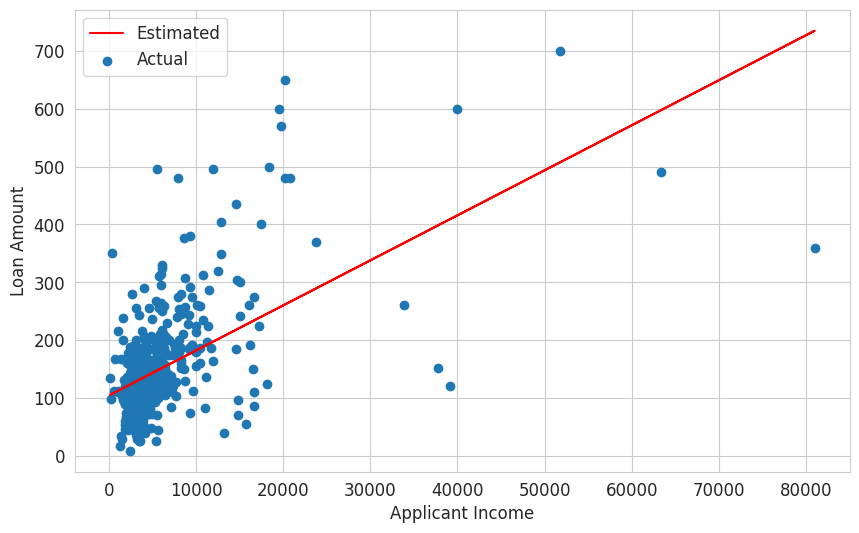

In [193]:
try_parameters(model.coef_, model.intercept_)

# Linear Regression using Multiple Features

So far, we've used on the "ApplicantIncome" feature to estimate "LoanAmount". Adding another features like "CoapplicantIncome" and "Educaion" are fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times ApplicantIncome + w_2 \times CoappicantIncome + w_3 \times Education + b$

We need to change just one line of code to include the BMI.

In [194]:
inputs = copy_df[['ApplicantIncome', 'CoapplicantIncome', 'Education']]
target = raw_df['LoanAmount']
model = LinearRegression().fit(inputs, target)
model_predict  = model.predict(inputs)
loss = rmse(target, model_predict)

print(loss)

65.59009962333157


*As a result of adding the 2 more inpus cols, the loss reduced not much by 4. This is because of a quite low correlation of these cols with the target col - LoanAmount*

In [195]:
# Our df is correlation
corr_df = copy_df.corr()

# The correlation of all columns with the target column
target_corr = corr_df['LoanAmount']
target_corr.sort_values(ascending=False)

,LoanAmount
LoanAmount,1.000000
ApplicantIncome,0.570909
CoapplicantIncome,0.188619
Education,0.171133
Dependents,0.163997
Married,0.149519
Self_Employed,0.123931
Loan_Amount_Term,0.039447
Credit_History,-0.008433
Loan_Status,-0.037318


In [196]:
px.scatter(copy_df,x='CoapplicantIncome', y='LoanAmount')

In [197]:
px.scatter(copy_df,x='Education', y='LoanAmount')

Let's also check the parameters of the model.

In [198]:
model.coef_

array([8.05120576e-03, 7.23076148e-03, 1.40129625e+01])

In [199]:
model.intercept_

np.float64(80.23019901142732)

# Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns we can train a single model for the entire dataset.

In [200]:
raw_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [201]:
raw_df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

We have *6* column with just *2 values* in column so we can replace this values with 0 and 1

In [202]:
m_s = {"No":0, "Yes":1}
loan_code = {"N":0, "Y":1}
gender_code = {"Male":0, "Female":1}
education_code = {"Not Graduate":0, "Graduate":1}

raw_df['Married_code'] = raw_df.Married.map(m_s)
raw_df['Self_Employed_code'] = raw_df.Self_Employed.map(m_s)
raw_df['Loan_Status_code'] = raw_df.Loan_Status.map(loan_code)
raw_df['Gender_code'] = raw_df.Gender.map(gender_code)
raw_df['Education_code'] = raw_df.Education.map(education_code)

In [203]:
raw_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_code,Self_Employed_code,Loan_Status_code,Gender_code,Education_code
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,0.0,1,0.0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,0.0,0,0.0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1,0.0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,0.0,1,0.0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,0.0,1,0.0,1


In "Property_Area" we have "Urban", "Semiurban", "Rural" values that represent nominal data (no meaningful numerical order),so we will One-hot Encoding

In [204]:
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder() # is a preprocessing technique that converts categorical variables into binary (0s and 1s) format.
encoder.fit(raw_df[['Property_Area']])
encoder.categories_

[array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [205]:
one_hot = encoder.transform(raw_df[['Property_Area']]).toarray() # applies the encoding learned from .fit() and converts "Property_Area" into a numerical format.
one_hot                                                      # .toarray() converts the output into a NumPy array.

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

Let's create new 3 columns : *'Rural', 'Semiurban', 'Urban'*

In [206]:
raw_df[['Rural', 'Semiurban', 'Urban']] = one_hot
raw_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_code,Self_Employed_code,Loan_Status_code,Gender_code,Education_code,Rural,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,0.0,1,0.0,1,0.0,0.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,0.0,0,0.0,1,1.0,0.0,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1,0.0,1,0.0,0.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,0.0,1,0.0,0,0.0,0.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,0.0,1,0.0,1,0.0,0.0,1.0


Let's include the categorical columns into our linear regression model.

$charges = w_n \times Gender + w_n \times Married + w_n \times Education + w_n \times Self_Employed + w_n \times Propery_Area(s) + w_n \times Loan_Status + b$

Seems like we have NaN values in our numeric cols, let;s fix it

In [207]:
imputer_numeric = SimpleImputer(strategy='mean')
imputer_numeric.fit(raw_df[numeric_cols])
raw_df[numeric_cols] = imputer_numeric.transform(raw_df[numeric_cols])

In [208]:
raw_df.dropna(subset=['Married_code', 'Self_Employed_code', 'Gender_code','Dependents'],inplace=True)

In [209]:
raw_df['Dependents'] =raw_df['Dependents'].replace({'3+':3}).astype(float)

Let's check if we have NaN values

In [210]:
raw_df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


So, we can train our model

In [211]:
input_colss = ['Dependents','ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Gender_code', 'Married_code', 'Education_code', 'Self_Employed_code', 'Rural', 'Semiurban', 'Urban', ]

input = raw_df[input_colss]
target = raw_df['LoanAmount']
model = LinearRegression().fit(input, target)
model_predicted = model.predict(input)
loss = rmse(target, model_predicted)

print(loss)

64.98290611311772


Once again, this leads to a fairly *0 reduction* in the loss.

# Model Improvements

To compare the importance of each feature in the model, we can create df to compare their weights.

In [212]:
weights_df = pd.DataFrame({
    'feauture' : np.append(input_colss, 'intecept'),
    'weight' : np.append(model.coef_, model.intercept_)
})
weights_df.sort_values(by='weight',ascending=False)

,feauture,weight
12,intecept,32.096815
6,Married_code,17.126707
7,Education_code,15.250536
8,Self_Employed_code,11.755186
9,Rural,4.882346
0,Dependents,4.566476
10,Semiurban,0.507927
3,Loan_Amount_Term,0.107931
1,ApplicantIncome,0.007439
2,CoapplicantIncome,0.007334


In [213]:
print(model.coef_, model.intercept_, sep='\n')

[ 4.56647550e+00  7.43911473e-03  7.33394745e-03  1.07930876e-01
 -2.53491698e+00 -3.97983784e+00  1.71267074e+01  1.52505358e+01
  1.17551858e+01  4.88234575e+00  5.07926599e-01 -5.39027235e+00]
32.096815275007145


Some of the numerical features — such as ApplicantIncome, CoapplicantIncome, and Loan_Amount_Term — have values on very different scales. For instance, income values can range in the thousands, while other features like binary indicators (e.g. Married_code, Gender_code) range from 0 to 1.

Because different columns have different ranges, we run into one issue:

*We can't compare the weights of different column to identify which features are important*

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

***Feature scaling is a preprocessing technique used to normalize or standardize the range of independent variables (features) in your dataset.***

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [214]:
raw_df.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_code,Self_Employed_code,Loan_Status_code,Gender_code,Education_code,Rural,Semiurban,Urban
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,0.0,0.0,1,0.0,1,0.0,0.0,1.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,1.0,0.0,0,0.0,1,1.0,0.0,0.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1,0.0,1,0.0,0.0,1.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,0.0,1,0.0,0,0.0,0.0,1.0
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,0.0,0.0,1,0.0,1,0.0,0.0,1.0
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417.0,4196.0,267.000000,360.0,1.0,Urban,Y,1.0,1.0,1,0.0,1,0.0,0.0,1.0
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333.0,1516.0,95.000000,360.0,1.0,Urban,Y,1.0,0.0,1,0.0,0,0.0,0.0,1.0


In [215]:
numeric_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [216]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # it will learn the mean and standard deviation of the specified columns when you call .fit().
scaler.fit(raw_df[numeric_cols]) #  Calculates the mean and standard deviation for each of the columns listed in numeric_cols

print(scaler.mean_)
print(scaler.var_)

[5.26705957e+03 1.58557567e+03 1.44969009e+02 3.41956679e+02
 8.43347543e-01]
[2.97050903e+07 6.36152030e+06 6.56184361e+03 4.18210643e+03
 1.21797111e-01]


We can now scale data as follows:

In [217]:
scaled_numeric_inputs = scaler.transform(raw_df[numeric_cols])
scaled_numeric_inputs

array([[ 0.10677341, -0.62864652,  0.01781556,  0.27900947,  0.44886807],
       [-0.12551004, -0.03075708, -0.20948047,  0.27900947,  0.44886807],
       [-0.4159561 , -0.62864652, -0.97486337,  0.27900947,  0.44886807],
       ...,
       [ 0.51464553, -0.5334917 ,  1.3336302 ,  0.27900947,  0.44886807],
       [ 0.42492467, -0.62864652,  0.51886776,  0.27900947,  0.44886807],
       [-0.12551004, -0.62864652, -0.14775605,  0.27900947, -2.41650718]])

We can now we combined with the categorical data

In [218]:
categ_codes = ['Married_code', 'Self_Employed_code',	'Loan_Status_code',	'Gender_code',	'Education_code',	'Rural',	'Semiurban',	'Urban']
categ_code_inputs = raw_df[categ_codes].values # convert the result into a NumPy array.
categ_code_inputs

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

Now, we can train our improved model version

In [219]:
inputs = np.concatenate([scaled_numeric_inputs, categ_code_inputs], axis=1)
target = raw_df['LoanAmount']

model = LinearRegression().fit(inputs, target)
predicted = model.predict(inputs)
loss = rmse(target, predicted)

print(loss)


9.162265174518207e-14


***We have reduced the loss of our model by 56, because the model performs better and avoids bias toward larger-scale features, which is a very amazing result***

We can now compare the weights

In [220]:
weights_df = pd.DataFrame({
    'feauture' : np.append(numeric_cols+categ_codes, 'intecept'),
    'weight' : np.append(model.coef_, model.intercept_)
})
weights_df.sort_values(by='weight',ascending=False)

,feauture,weight
13,intecept,1.449690e+02
2,LoanAmount,8.100521e+01
1,CoapplicantIncome,8.526513e-14
0,ApplicantIncome,4.752734e-14
7,Loan_Status_code,7.105427e-15
12,Urban,6.661338e-15
3,Loan_Amount_Term,5.939693e-15
6,Self_Employed_code,1.776357e-15
4,Credit_History,8.881784e-16
11,Semiurban,3.330669e-16


# Creating a Test Set

It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [221]:
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(inputs, target, test_size=0.1)

*Training*

In [222]:
model = LinearRegression().fit(input_train,target_train)
predict_train = model.predict(input_train)
loss = rmse(target_train, predict_train)

print(loss)

1.853995551172819e-13


*Test*

In [223]:
predict_test= model.predict(input_test)
loss = rmse(target_test, predict_test)

print(loss)

1.793429329673495e-13


# Conclusion

With a test RMSE of 1.26, the model accurately estimates loan amounts for new applicants, suggesting that it can generalize well to unseen data

While there is some underfitting (as seen from the training RMSE of 8.82), the model still provides reliable predictions overall.